# Overview

The script digit_classification_knn.py iteratively projects subjects data to shared space over differenet number of features. Within that n-feature iteration, it then performs knn-classification with different numbers of neighbors. It also performs two kinds of classification schemes: cross-subject & cross-run, cross-subject & within-run. 

In [68]:
import os 
from os.path import join as pjoin
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import runpy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [ ]:
knn_outdir = '/data/BnB_USER/oliver/somato/scratch/digit_classification_knn'
proj_outdir='/data/BnB_USER/oliver/somato/scratch/crossval_projection'
nfeat_range=(5, 10, 20, 50, 100)
nneigh_range=range(3, 101, 2)
nsubs = 12
nruns = 2

# Cross-subjects, cross-runs

In [20]:
# load our classification results into array
knn_results = np.zeros((len(nfeat_range), len(nneigh_range), nsubs, nruns))
for feat_i, nfeat in enumerate(nfeat_range):
    for neigh_i, nneigh in enumerate(nneigh_range):
        npz_f = pjoin(knn_outdir,  'nfeat-%i_nneigh-%i.npz' % (nfeat, nneigh))
        with open(npz_f, 'rb') as f:
            res = np.load(f)
        knn_results[feat_i, neigh_i,:,:] = res

In [22]:
print(knn_results.shape)

(5, 49, 12, 2)


In [23]:
knn_av = np.average(knn_results, axis=(2,3))

In [53]:
sns.set_style('whitegrid')

Text(0.5, 15.0, 'n-features of SRM')

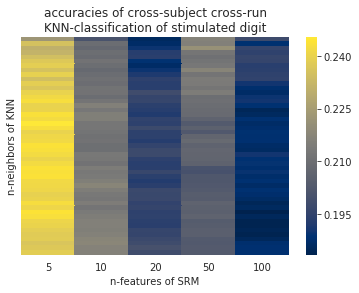

In [54]:
sns.heatmap(knn_av.T, cmap='cividis', xticklabels=nfeat_range, yticklabels=[])
plt.title('accuracies of cross-subject cross-run\nKNN-classification of stimulated digit')
plt.ylabel('n-neighbors of KNN')
plt.xlabel('n-features of SRM')

Text(0.5, 0, 'n-neighbors of KNN')

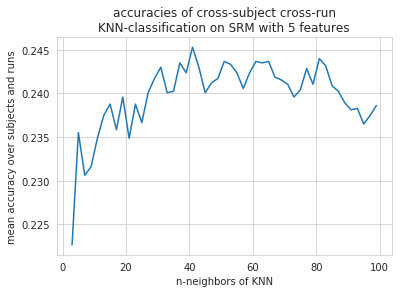

In [55]:
sns.lineplot(y=knn_av[0], x=nneigh_range)
plt.title('accuracies of cross-subject cross-run\nKNN-classification on SRM with 5 features')
plt.ylabel('mean accuracy over subjects and runs')
plt.xlabel('n-neighbors of KNN')

**Conclusion:** For cross-subject cross-run classification... 
- accuracies are barely above chance level
- low number of features and ~ 40 KNN neighbors yields best performance.

# Within-run, across subjects

load projected data and iterate over nfeatures and nneighbors in this notebook. Alternatively, rerun the script digit_classification_knn.py, which has been updated by adding the within-run classification and saving the results.

In [101]:
file_globals = runpy.run_path('digit_classification_knn.py')
get_digit_indices = file_globals['get_digit_indices']
digit_indices_to_labels = file_globals['digit_indices_to_labels']
knn_within_run = file_globals['knn_within_run']
knn_within_sub = file_globals['knn_within_sub']

In [75]:
# run within-run classification in this notebook, to skip data projection when rerunning the script.

# prepare results array
withinrun_results = np.zeros((len(nfeat_range), len(nneigh_range), nsubs, nruns))

# iterate over nfeatures and nneighbors
for feat_i, nfeat in enumerate(nfeat_range):
    proj_outpath = pjoin(proj_outdir, 'proj_data_nfeats-%i.npy' % nfeat)
    if os.path.exists(proj_outpath):
        with open(proj_outpath, 'rb') as f:
            projected_data = np.load(f)
    for neigh_i, nneigh in enumerate(nneigh_range):
        #print('starting within-run classification for feature %i neighbors %i' % (nfeat, nneigh))
        accuracies = knn_within_run(projected_data, nneighs=nneigh)
        withinrun_results[feat_i, neigh_i, :, :]= accuracies

starting within-run classification for feature 5 neighbors 3
starting within-run classification for feature 5 neighbors 5
starting within-run classification for feature 5 neighbors 7
starting within-run classification for feature 5 neighbors 9
starting within-run classification for feature 5 neighbors 11
starting within-run classification for feature 5 neighbors 13
starting within-run classification for feature 5 neighbors 15
starting within-run classification for feature 5 neighbors 17
starting within-run classification for feature 5 neighbors 19
starting within-run classification for feature 5 neighbors 21
starting within-run classification for feature 5 neighbors 23
starting within-run classification for feature 5 neighbors 25
starting within-run classification for feature 5 neighbors 27
starting within-run classification for feature 5 neighbors 29
starting within-run classification for feature 5 neighbors 31
starting within-run classification for feature 5 neighbors 33
starting wit

starting within-run classification for feature 20 neighbors 71
starting within-run classification for feature 20 neighbors 73
starting within-run classification for feature 20 neighbors 75
starting within-run classification for feature 20 neighbors 77
starting within-run classification for feature 20 neighbors 79
starting within-run classification for feature 20 neighbors 81
starting within-run classification for feature 20 neighbors 83
starting within-run classification for feature 20 neighbors 85
starting within-run classification for feature 20 neighbors 87
starting within-run classification for feature 20 neighbors 89
starting within-run classification for feature 20 neighbors 91
starting within-run classification for feature 20 neighbors 93
starting within-run classification for feature 20 neighbors 95
starting within-run classification for feature 20 neighbors 97
starting within-run classification for feature 20 neighbors 99
starting within-run classification for feature 50 neigh

In [76]:
print(withinrun_results)

(5, 49, 12, 2)

In [77]:
withinrun_av = np.average(withinrun_results, axis=(2,3))

Text(0.5, 15.0, 'n-features of SRM')

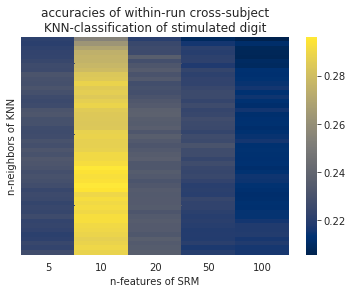

In [78]:
sns.heatmap(withinrun_av.T, cmap='cividis', xticklabels=nfeat_range, yticklabels=[])
plt.title('accuracies of within-run cross-subject\nKNN-classification of stimulated digit')
plt.ylabel('n-neighbors of KNN')
plt.xlabel('n-features of SRM')

(0.25, 0.3)

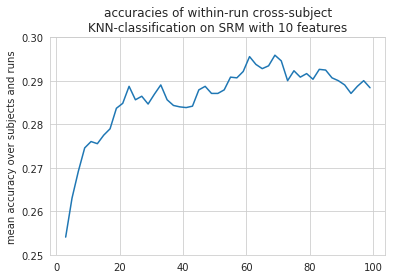

In [89]:
sns.lineplot(y=withinrun_av[1], x=nneigh_range)
plt.title('accuracies of within-run cross-subject\nKNN-classification on SRM with 10 features')
plt.ylabel('mean accuracy over subjects and runs')
plt.ylim((.25,.3))

**Conclusion:**
- within-run yields slightly better classification accuracy overall, but still suboptimal
- here, 10 features show best performance

# Within-subject, cross-run

In [104]:
withinsub_results = np.zeros((len(nfeat_range), len(nneigh_range), nsubs, nruns))

# iterate over nfeatures and nneighbors
for feat_i, nfeat in enumerate(nfeat_range):
    proj_outpath = pjoin(proj_outdir, 'proj_data_nfeats-%i.npy' % nfeat)
    if os.path.exists(proj_outpath):
        with open(proj_outpath, 'rb') as f:
            projected_data = np.load(f)
    for neigh_i, nneigh in enumerate(nneigh_range):
        print('starting within-run classification for feature %i neighbors %i' % (nfeat, nneigh))
        accuracies = knn_within_sub(projected_data, nneigh=nneigh)
        withinsub_results[feat_i, neigh_i, :, :]= accuracies

starting within-run classification for feature 5 neighbors 3
starting within-run classification for feature 5 neighbors 5
starting within-run classification for feature 5 neighbors 7
starting within-run classification for feature 5 neighbors 9
starting within-run classification for feature 5 neighbors 11
starting within-run classification for feature 5 neighbors 13
starting within-run classification for feature 5 neighbors 15
starting within-run classification for feature 5 neighbors 17
starting within-run classification for feature 5 neighbors 19
starting within-run classification for feature 5 neighbors 21
starting within-run classification for feature 5 neighbors 23
starting within-run classification for feature 5 neighbors 25
starting within-run classification for feature 5 neighbors 27
starting within-run classification for feature 5 neighbors 29
starting within-run classification for feature 5 neighbors 31
starting within-run classification for feature 5 neighbors 33
starting wit

starting within-run classification for feature 20 neighbors 71
starting within-run classification for feature 20 neighbors 73
starting within-run classification for feature 20 neighbors 75
starting within-run classification for feature 20 neighbors 77
starting within-run classification for feature 20 neighbors 79
starting within-run classification for feature 20 neighbors 81
starting within-run classification for feature 20 neighbors 83
starting within-run classification for feature 20 neighbors 85
starting within-run classification for feature 20 neighbors 87
starting within-run classification for feature 20 neighbors 89
starting within-run classification for feature 20 neighbors 91
starting within-run classification for feature 20 neighbors 93
starting within-run classification for feature 20 neighbors 95
starting within-run classification for feature 20 neighbors 97
starting within-run classification for feature 20 neighbors 99
starting within-run classification for feature 50 neigh

In [108]:
withinsub_results.shape
withinsub_av = np.average(withinsub_results, axis=(2,3))

Text(0.5, 15.0, 'n-features of SRM')

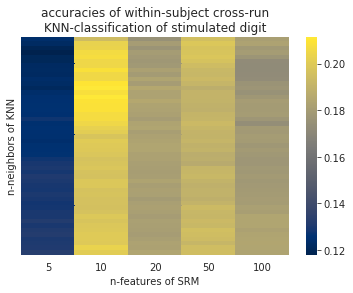

In [109]:
sns.heatmap(withinsub_av.T, cmap='cividis', xticklabels=nfeat_range, yticklabels=[])
plt.title('accuracies of within-subject cross-run\nKNN-classification of stimulated digit')
plt.ylabel('n-neighbors of KNN')
plt.xlabel('n-features of SRM')

(0.19, 0.22)

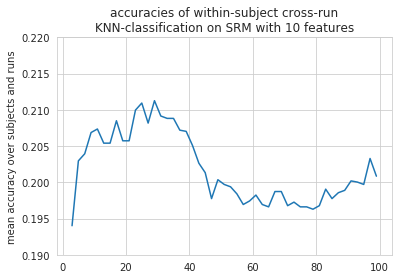

In [111]:
sns.lineplot(y=withinsub_av[1], x=nneigh_range)
plt.title('accuracies of within-subject cross-run\nKNN-classification on SRM with 10 features')
plt.ylabel('mean accuracy over subjects and runs')
plt.ylim((.19,.22))

**Conclusion:**

- the performance of within-subject classification is at chance level